In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Initial Data Exploration

In [6]:
#get the basic info about the data
print("training data info:")
print(train_df.info())

print("Training Data Description")
print(train_df.describe())


training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Training Data Description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.69911

In [7]:
#check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Data Cleaning (Handling Missing values)

In [9]:
#filling missing 'Age' values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df['Age'].fillna(test_df['Age'].median(), inplace = True)

#filling missing 'Embarked' values with the most common port
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

#For 'Cabin', there are too many missing values. A common approach is to create a new feature.
# We'll create a feature 'HasCabin' indicating whether the cabin info was available.
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)
test_df['HasCabin'] = test_df['Cabin'].notnull().astype(int)

#now  we can drop the 'Cabin' column now,
train_df.drop(['Cabin'], axis=1 , inplace =True)
test_df.drop(['Cabin'], axis=1 , inplace =True)

#check missing values after the handling
print("Missing values after cleaning")
print(train_df.isnull().sum())


Missing values after cleaning
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_29488\935767358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_29488\935767358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
#we can drop the ticket column as well. because it's complex
train_df.drop(['Ticket'],axis = 1 , inplace = True)
test_df.drop(['Ticket'],axis = 1 , inplace = True)

Data Visualization & Analysis

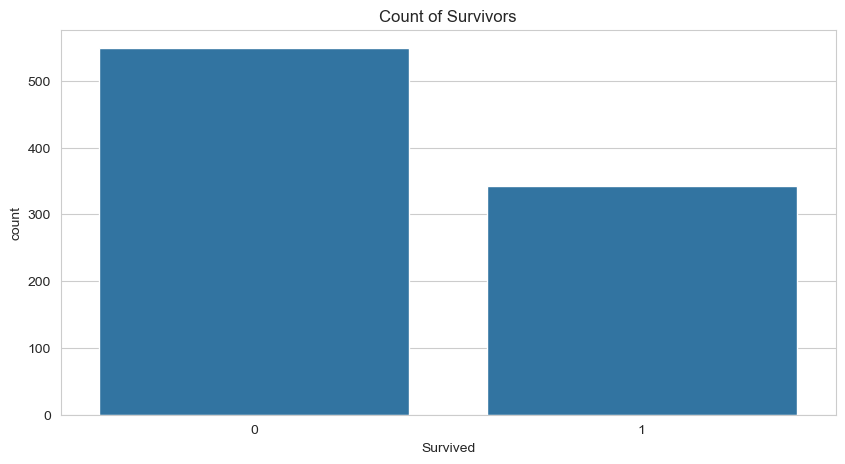

In [14]:
sns.set_style('whitegrid')

#Figure 1: Count Of survivors
plt.figure(figsize=(10,5))
sns.countplot(x='Survived' , data=train_df)
plt.title('Count of Survivors')
plt.show()

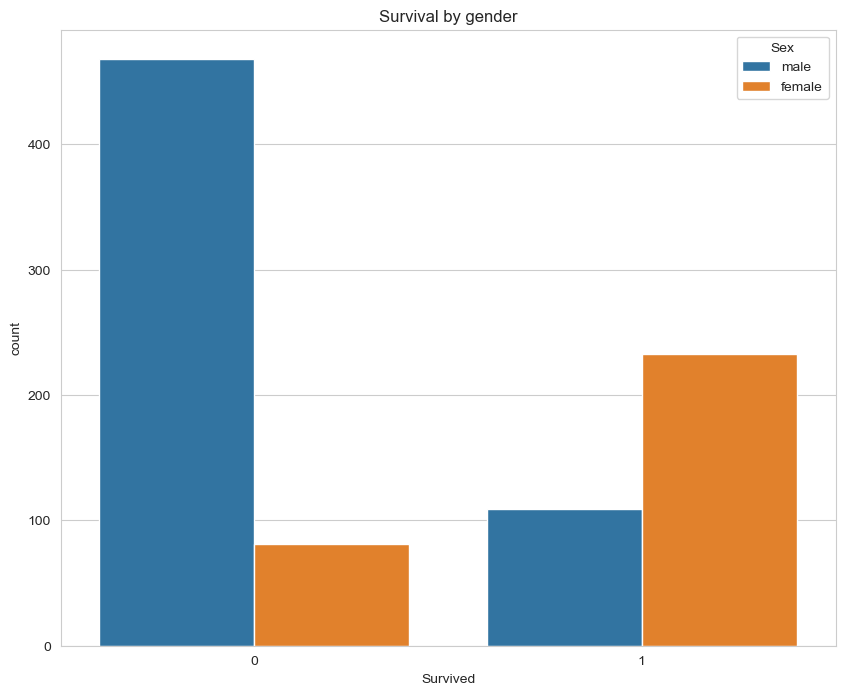

In [15]:
#Figure 2 : Survival by Gender
plt.figure(figsize=(10,8))
sns.countplot(x = 'Survived' , hue = 'Sex', data=train_df)
plt.title('Survival by gender')
plt.show()

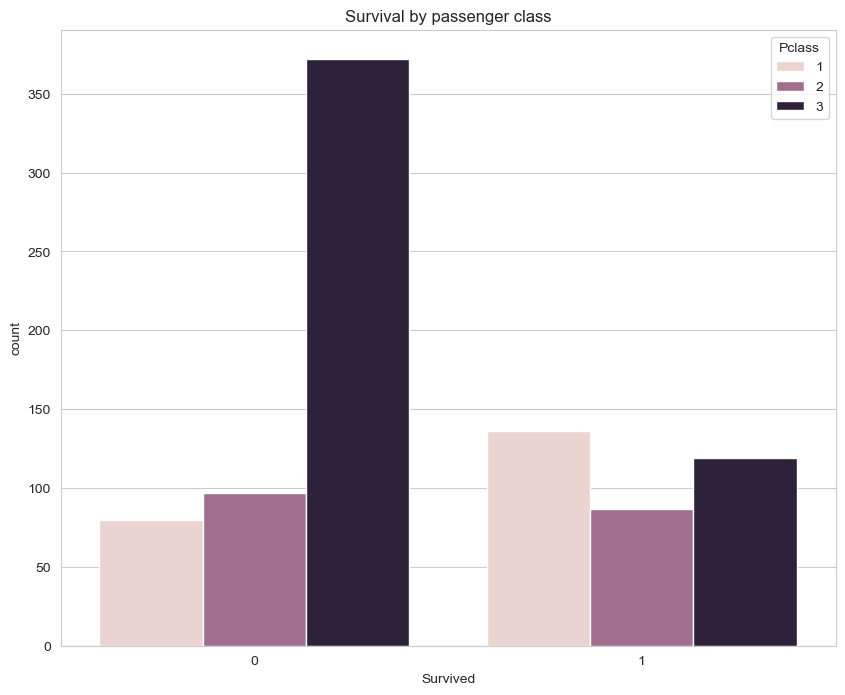

In [17]:
#Figure 2 : Survival by Class
plt.figure(figsize=(10,8))
sns.countplot(x = 'Survived' , hue = 'Pclass', data=train_df)
plt.title('Survival by passenger class')
plt.show()

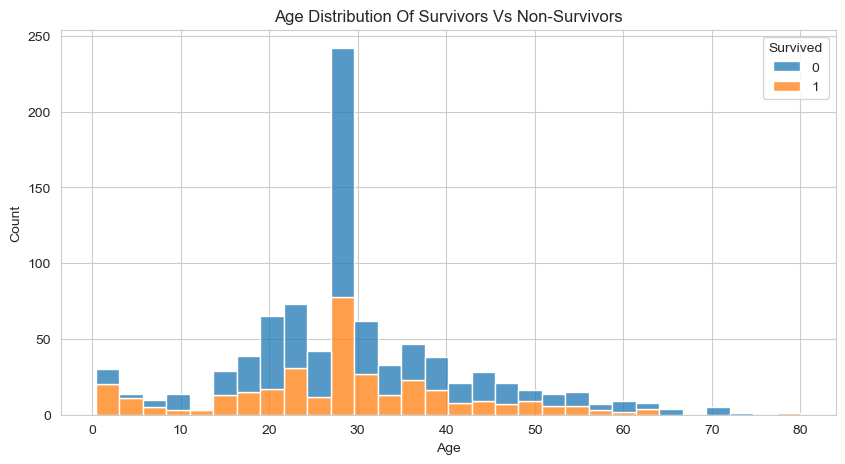

In [21]:
#Figure 3 :Age Distribution Of Survivors Vs Non-Survivors
plt.figure(figsize=(10,5))
sns.histplot(x='Age', hue='Survived' , data=train_df,  multiple = 'stack')
plt.title('Age Distribution Of Survivors Vs Non-Survivors')
plt.show()


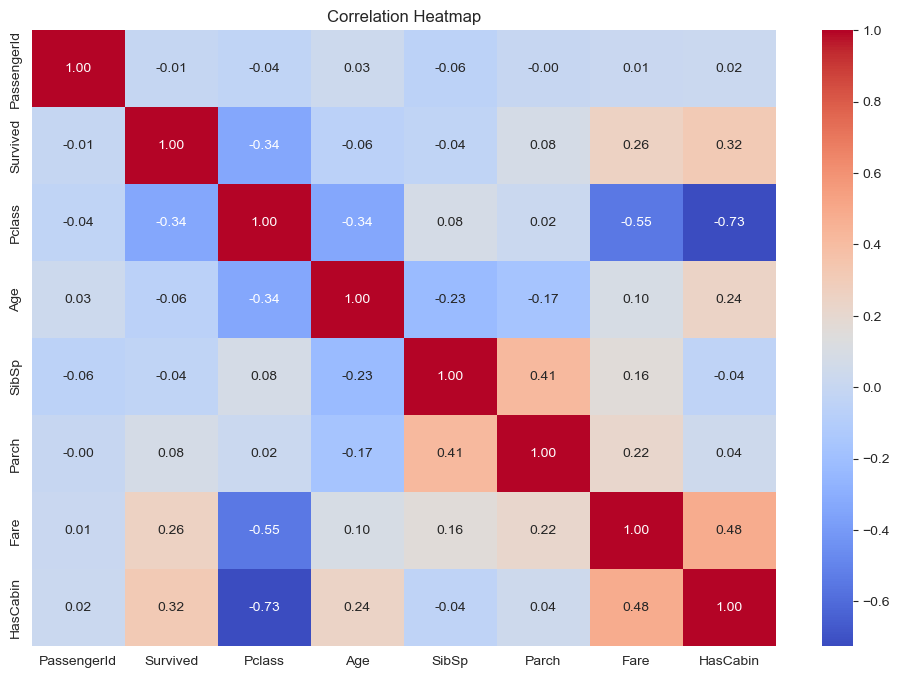

In [27]:
plt.figure(figsize=(12,8))
numerical_features = train_df.select_dtypes(include=[np.number])
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()